## Import libraries

In [2]:
import tomopy
from helperFunctions import MoviePlotter
from tomoDataClass import tomoData

## Create Simulated Data

In [3]:
#Set constants
numAngles = 200 #Number of projection angles
imageSize = 256 #Pixel size of one side of cubic array containing Shepp3D phantom

In [4]:
#Create a simulated object
obj = tomopy.shepp3d(size=imageSize)
print(obj.shape)
print("Simulated Object")
MoviePlotter(obj) #Plots vertical slices through the phantom

(256, 256, 256)
Simulated Object


Output()

In [5]:
# Set projection angles
angles = tomopy.angles(nang=numAngles, ang1=1, ang2=360)

# create projection images/sinogram
projections = tomopy.project(obj, angles, pad=False)

print("Projections through object")
MoviePlotter(projections)

Projections through object


Output()

In [6]:
tomo = tomoData(projections)
tomo.jitter(maxShift = 7)
tomo.add_noise()
print("Projections through Object with jitter and noise")
tomo.makeNotebookProjMovie()

Projections through Object with jitter and noise


Output()

## Align Data

In [7]:
#Show bad reconstruction prior to alignment
tomo.reconstruct(algorithm='art')
print("\nBad reconstruction prior to alignment")
badRecon = tomo.recon.copy()
MoviePlotter(badRecon)



Using CPU-based reconstruction. Algorithm:  art
Reconstruction completed.

Bad reconstruction prior to alignment


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

Output()



Normalizing projections


Cross-Correlation Alignment


Iteration 1/15: 100%|██████████| 200/200 [00:02<00:00, 86.73it/s]


Average pixel shift of iteration 1: 5.029343281838449


Iteration 2/15: 100%|██████████| 200/200 [00:01<00:00, 104.47it/s]


Average pixel shift of iteration 2: 0.21700058016357437


Iteration 3/15: 100%|██████████| 200/200 [00:01<00:00, 105.92it/s]

Average pixel shift of iteration 3: 0.0
Convergence reached after 3 iterations.
Maximum iterations reached without convergence.


Projection Matching Alignment (PMA)
Centering Projections


Original center: 125.75
Center of frame: 128
Aligned projections shifted by 2.25 pixels
Projections are currently centered at pixel 128.0. Residual offset: 0.0


PMA Algorithm iterations:   0%|          | 0/5 [00:00<?, ?it/s]Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

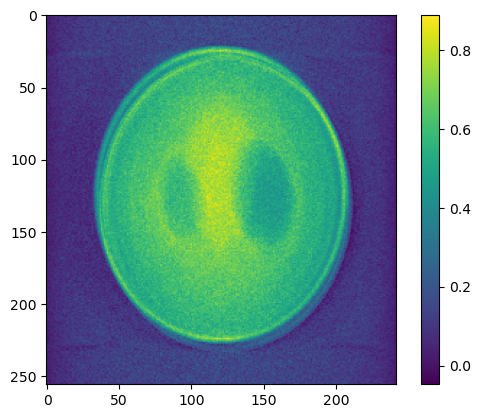

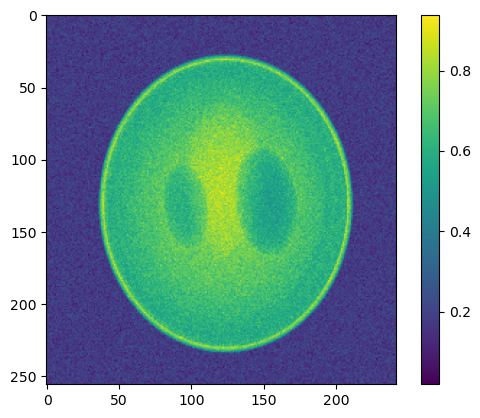

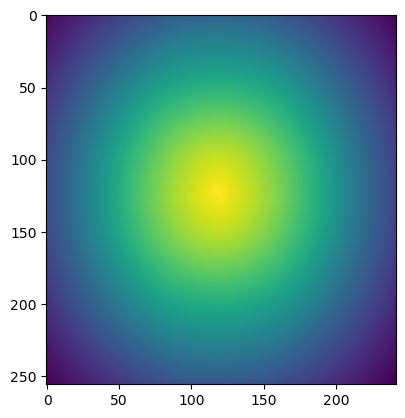

Y shift: -6 X shift: -3


PMA Algorithm iterations:  20%|██        | 1/5 [00:04<00:19,  4.98s/it]

Average pixel shift of iteration 0 - (x: 2.91, y: 1.575), Total: 3.452593102737191


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

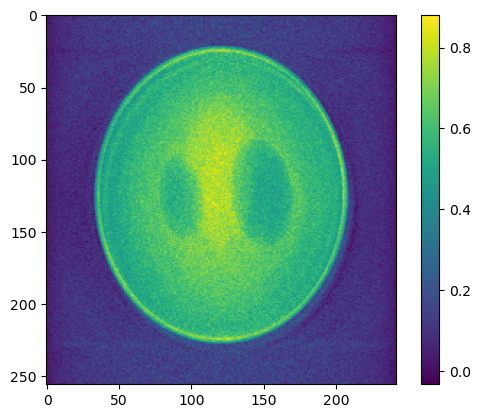

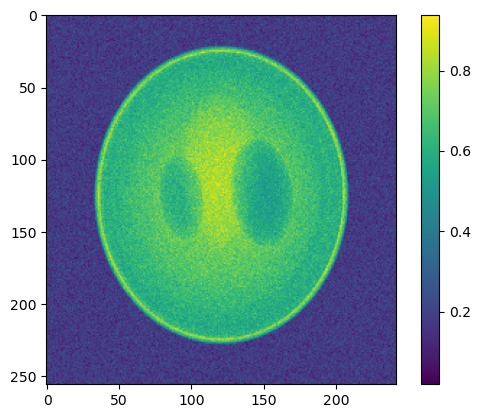

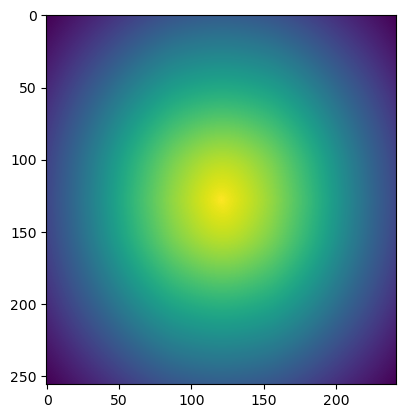

Y shift: 0 X shift: 0


PMA Algorithm iterations:  40%|████      | 2/5 [00:10<00:15,  5.04s/it]

Average pixel shift of iteration 1 - (x: 0.485, y: 0.185), Total: 0.5391556006821232


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

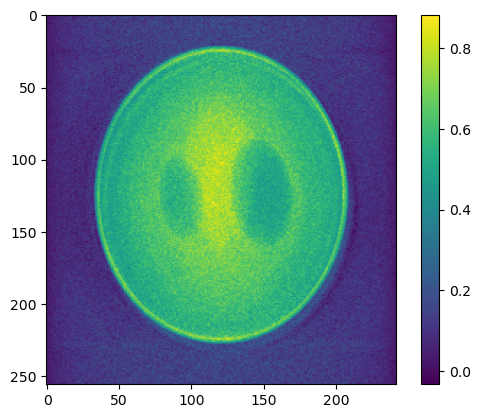

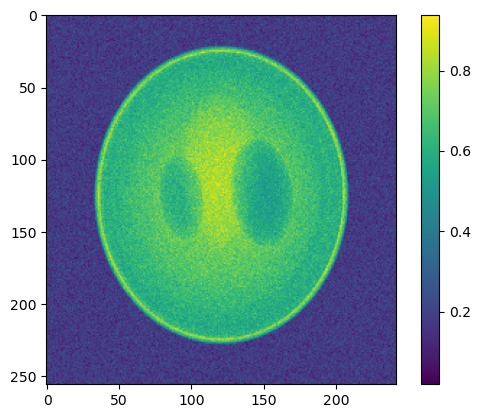

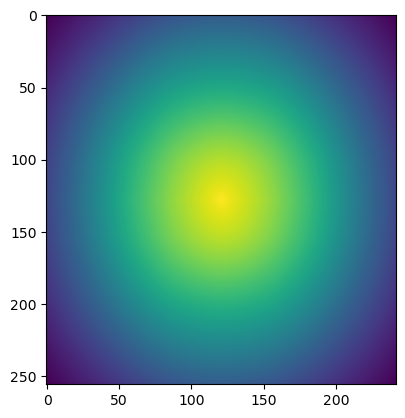

Y shift: 0 X shift: 0


PMA Algorithm iterations:  40%|████      | 2/5 [00:15<00:22,  7.50s/it]


Average pixel shift of iteration 2 - (x: 0.02, y: 0.035), Total: 0.04280311648918275
Convergence reached after 3 iterations.


Apply shifts to final projections: 100%|██████████| 200/200 [00:01<00:00, 171.15it/s]


In [8]:
tomo.reset_workingProjections(x_size=imageSize, y_size=imageSize) #You can adjust these for tighter cropping
tomo.normalize(isPhaseData=False)
tomo.cross_correlate_align(tolerance=0.1, max_iterations=15, stepRatio=1, yROI_Range=None, xROI_Range=None)
tomo.PMA(max_iterations=5, tolerance=0.05, algorithm='art', crop_bottom_center_y=imageSize, crop_bottom_center_x=imageSize, standardize=False)
tomo.make_updates_shift()

In [9]:
tomo.makeNotebookProjMovie()

Output()

In [10]:
tomo.reconstruct(algorithm='art')
print("\nGood Reconstruction after alignment")
tomo.makeNotebookReconMovie()



Using CPU-based reconstruction. Algorithm:  art
Reconstruction completed.

Good Reconstruction after alignment


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

Output()